In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.puot import PUOT
from src.algo import calc_U, solve_entropic_uot, solve_entropic_puot, round_plan
from demo import gen_gaussian, gen_fragmented_hypercube
from visualize import visualize_2D_plan, visualize_3D_plan

# Random seed
SEED = 3698

In [2]:
# Dimensions
n = 20
m = 20
d = 3

In [3]:
# Generate synthetic data
datatype = 'Gaussian'
if datatype == 'Gaussian':
    k_star = 3
    X, Y = gen_gaussian(n, m, d, k_star, seed=SEED)
elif datatype == 'Hypercube':
    k_star = 3
    X, Y = gen_fragmented_hypercube(n, m, d, k_star, seed=SEED)

In [4]:
np.random.seed(SEED)

# Generate marginals
alpha = 4.0
beta = 2.0

a = np.random.rand(n)
b = np.random.rand(m)

a = a / a.sum() * alpha
b = b / b.sum() * beta

In [5]:
# Regularization parameters
tau = np.float64(5.0)

# Dimension of subspace
k = 2

# Original PUOT
puot = PUOT(X, Y, a, b, tau, k)

In [6]:
# Original UOT
uot = puot.original()
pi_star = uot.optimize_f()
f_star = uot.calc_f(pi_star)

15.17721096373455


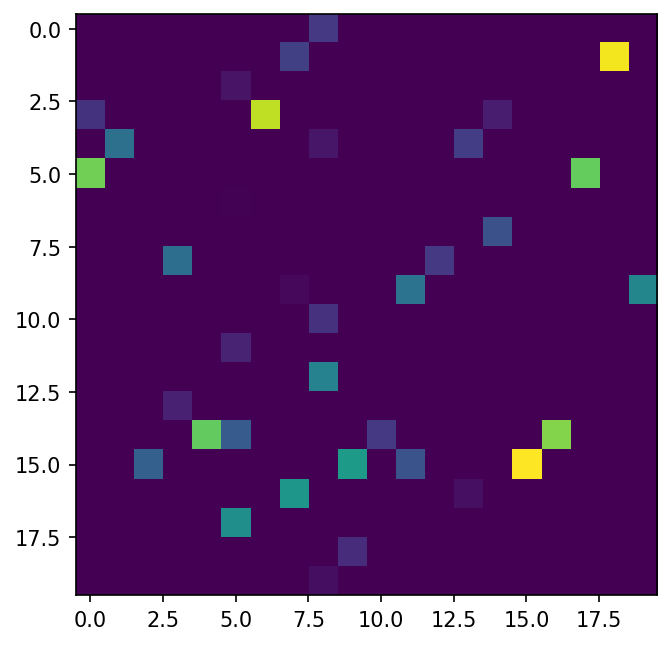

In [7]:
print(f_star)
fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=150)
ax.imshow(pi_star)
plt.show()

In [8]:
# Entropic UOT
eps = 1
eta = eps / calc_U(uot, eps)

euot = uot.entropic_regularize(eta)
# u_hat, v_hat = euot.optimize_h('SCS', verbose=True)
pi_hat = euot.optimize_g() #euot.calc_pi(u_hat, v_hat)
f_hat = euot.calc_f(pi_hat)

15.180292086027578


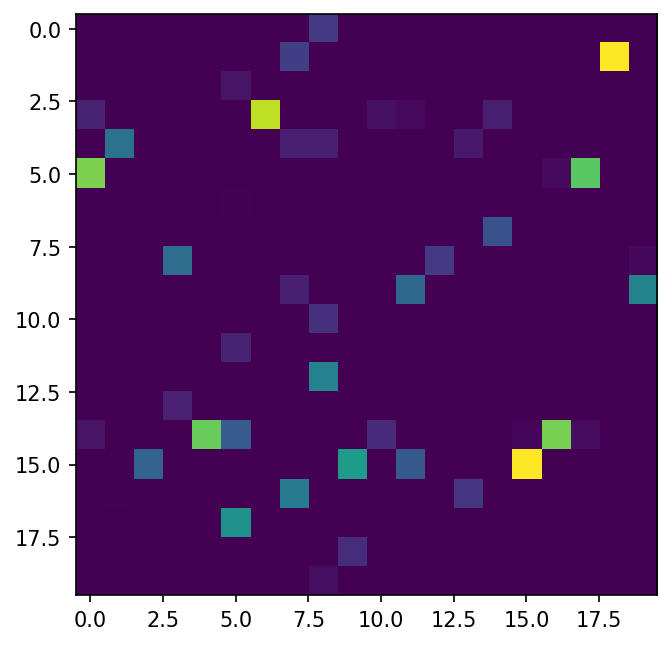

In [9]:
print(f_hat)
fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=150)
ax.imshow(pi_hat)
plt.show()

In [10]:
u, v = solve_entropic_uot(euot, np.zeros(n), np.zeros(m), 10000)
pi = euot.calc_pi(u, v)
f = euot.calc_f(pi)

15.18077619782354


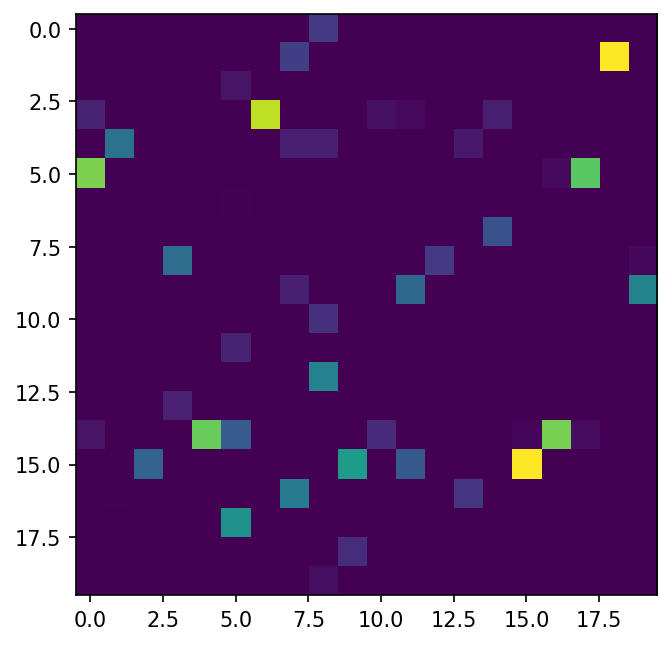

In [11]:
print(f)

fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=150)
ax.imshow(pi)
plt.show()

In [12]:
# Entropic regularized PUOT
epuot = puot.entropic_regularize(eta)

In [13]:
# Initial u and v
u0, v0 = np.zeros(n), np.zeros(m)

# Initial U
U0, _ = np.linalg.qr(np.random.randn(d, k))

In [14]:
# Step size
delta = np.float64(1e-6)

# Stopping condition
eps_uv = np.float64(1e-1)
eps_U = np.float64(1e-3)

# Run algorithm
log = solve_entropic_puot(epuot,
                            u0, v0,
                            U0,
                            delta,
                            eps_uv, eps_U,
                            max_uv=None, max_U=None,
                            save_uv=True, save_U=True)

     1 17.7481742   36296   17524
     2 17.6367545   36300   19794
     3 17.9262922   36303   17495
     4 17.9762757   36306   10874
     5 18.0840281   36308   10438
     6 17.7921767   36309    8366
     7 17.5066283   36309    5663
     8 17.4889097   36308    5207
     9 17.4966481   36308    5013
    10 17.5138812   36307    4936
    11 17.5407265   36306    4989
    12 17.5786137   36304    5195
    13 17.6246769   36302    5522
    14 17.6755656   36300    5931
    15 17.7290570   36297    6411
    16 17.7783509   36294    6953
    17 17.7837154   36290    7469
    18 17.6374143   36286    7496
    19 17.3146721   36281    6039
    20 17.0172535   36276    4142
    21 16.8494762   36272    3338
    22 16.7191980   36268    3013
    23 16.5968132   36264    2873
    24 16.4811285   36260    2792
    25 16.3782892   36256    2715
    26 16.2918467   36252    2629
    27 16.2214737   36249    2533
    28 16.1653128   36245    2435
    29 16.1212865   36241    2342
    30 16.0869

In [15]:
u, v = log['u'][-1], log['v'][-1]
U = log['U'][-1]

C = epuot.calc_proj_cost(U)
pi = epuot.calc_pi(u, v, C)

f = log['f'][-1]

16.460700199237472


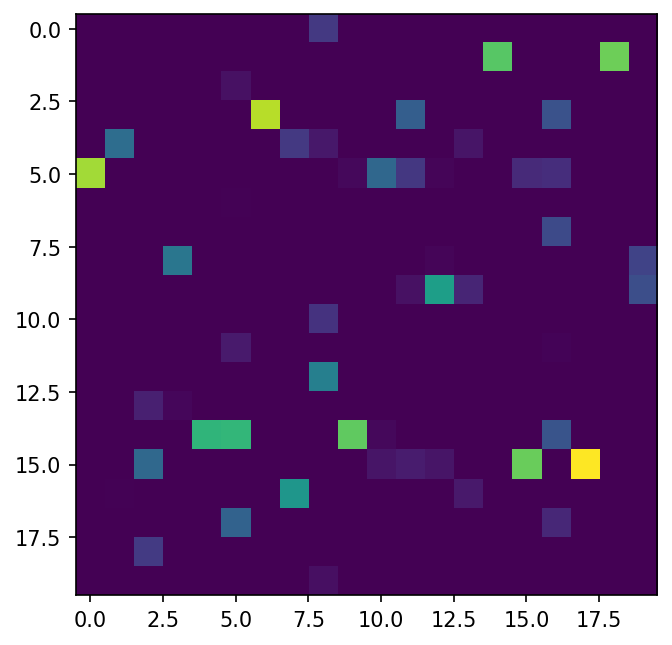

In [16]:
print(uot.calc_f(pi))

fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=150)
ax.imshow(pi)
plt.show()

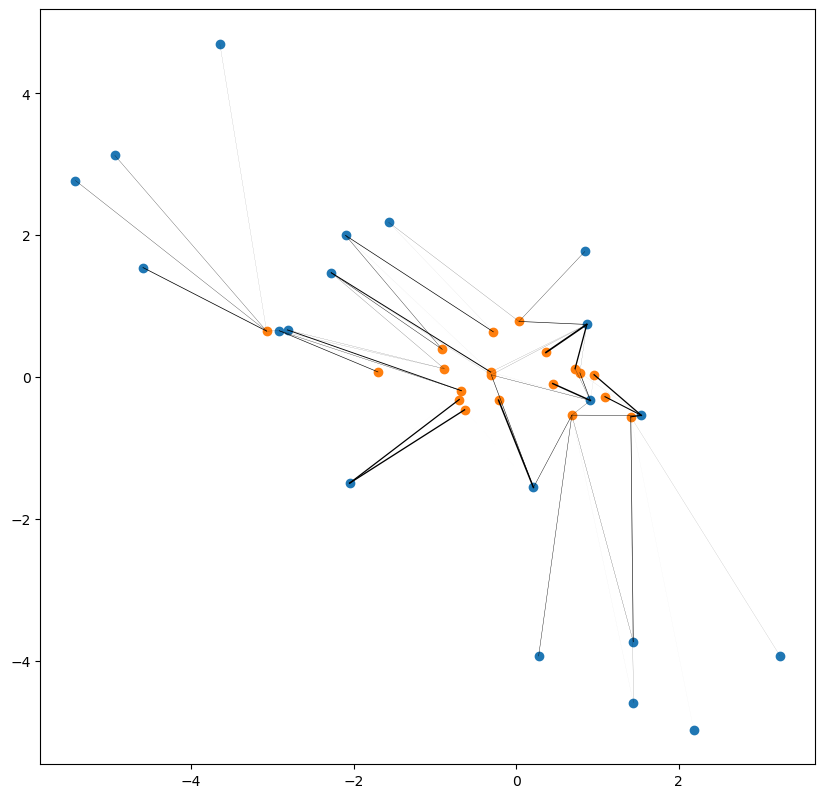

In [17]:
visualize_2D_plan(X, Y, U, pi)

In [18]:
visualize_3D_plan(X, Y, U, pi)

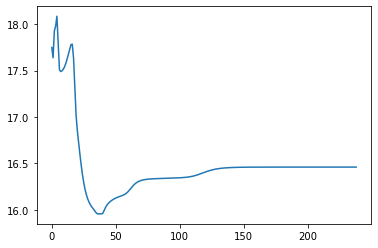

In [22]:
plt.plot(log['f'])

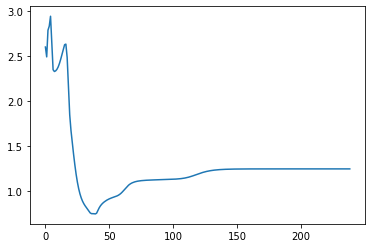

In [20]:
y = []
for uk, vk, Uk in zip(log['u'], log['v'], log['U']):
    Ck = epuot.calc_proj_cost(Uk)
    pik = epuot.calc_pi(uk, vk, Ck)
    y.append(euot.calc_g(pik) - euot.calc_g(pi_star))

plt.plot(y)

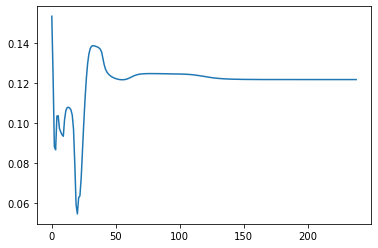

In [23]:
y = []
for uk, vk, Uk in zip(log['u'], log['v'], log['U']):
    Ck = epuot.calc_proj_cost(Uk)
    pik = epuot.calc_pi(uk, vk, Ck)
    y.append(np.abs(pik - pi_star).max())

plt.plot(y)